In [69]:
import csv
import random
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

def csv_to_kvs(fileName):
    make_dictionary = {}
    with open(fileName,'r') as csvFile:
        csvreader = csv.reader(csvFile)
        for row in csvreader:
            #position 1 and following are integers
            make_dictionary[row[0]] = [int(val) for val in row[1:]]
        print(make_dictionary)
    return make_dictionary

C36=csv_to_kvs('C_36all.csv')  


print(len(C36.keys()))

keysListC36 = list(C36.keys()) 
print(keysListC36)

{'123.456': [123, 253, 354, 134, 146, 456, 265, 162], '123.465': [152, 123, 134, 145, 465, 364, 263, 256], '123.546': [123, 243, 345, 135, 156, 465, 264, 162], '123.564': [154, 142, 123, 135, 365, 263, 246, 456], '123.645': [243, 123, 152, 254, 456, 165, 136, 346], '123.654': [245, 253, 123, 142, 164, 136, 356, 465], '124.356': [143, 124, 254, 345, 356, 265, 162, 136], '124.365': [152, 124, 143, 135, 365, 346, 264, 256], '124.536': [354, 145, 124, 234, 263, 162, 156, 365], '124.563': [153, 132, 124, 145, 465, 264, 236, 356], '124.635': [124, 152, 253, 234, 364, 356, 165, 146], '124.653': [124, 132, 235, 254, 456, 365, 163, 146], '125.346': [245, 354, 153, 125, 162, 136, 346, 264], '125.364': [153, 134, 142, 125, 265, 246, 364, 356], '125.436': [235, 345, 154, 125, 162, 146, 364, 263], '125.463': [154, 143, 132, 125, 265, 236, 346, 456], '125.634': [243, 235, 125, 142, 164, 156, 365, 346], '125.643': [245, 125, 132, 234, 364, 163, 156, 465], '126.345': [152, 135, 345, 254, 246, 364, 163

In [85]:
%run module2x2x2_ext_match.ipynb

from datetime import date

today = date.today()
print("Today's date:", today)

Today's date: 2024-04-17


# Investigating the number of buildable cubes using sets of 11 cubes

## Functions to use:

* **RandomKCubes**(dictionary, k)  <br>
dictionary = dictionary of cubes k = set of size k <br> output: a random selection of k cubes from dictionary

* **NumberBuildable4SetElevenCubes**(a_collection_of_ten_cubes, dictionary_possible_targets_to_build)  <br>
a_collection_of_ten_cubes is the output of RandomKCubes  <br>
output: the number of cubes in dictionary_possible_targets_to_build that are buildable with a_collection_of_nine_cubes

* **DistributionBuildNum4SetsOfEleven**(dictionary_sets, number_samples)<br>
output: this creates data that can be displayed in a histogram or frequency table

In [3]:
#Example selecting 11 random cubes from C36
RandomKCubes(C36, 11)

[[154, 142, 123, 135, 365, 263, 246, 456],
 [245, 125, 132, 234, 364, 163, 156, 465],
 [152, 135, 345, 254, 246, 364, 163, 126],
 [154, 143, 132, 125, 265, 236, 346, 456],
 [243, 254, 145, 134, 163, 156, 265, 236],
 [235, 153, 145, 254, 246, 164, 136, 263],
 [153, 134, 142, 125, 265, 246, 364, 356],
 [153, 132, 124, 145, 465, 264, 236, 356],
 [143, 345, 235, 132, 126, 256, 465, 164],
 [152, 145, 354, 253, 236, 346, 164, 126],
 [143, 154, 245, 234, 263, 256, 165, 136]]

In [3]:
def NumberBuildable4SetElevenCubes(one_collection_of_eleven, dictionary_for_targets): 
    keysList_targets = list(dictionary_for_targets.keys())
    ElevenSet = one_collection_of_eleven
  
    Collections=list(it.combinations(ElevenSet, 8))
      
    current_solution_array=np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])     

    #for each subset of 8 cubes, determine how many cubes are buildable
    for coll in Collections:
        a_solution_list=[]
            
        for j in keysList_targets:
            a_solution_list.append(CountingSolutions(CornerCountVector(coll, dictionary_for_targets[j])))
            
        newarray = np.array([w for w in a_solution_list])
        current_solution_array = current_solution_array + newarray
  
    Number_buildable_cubes = np.count_nonzero(current_solution_array)
    
    return Number_buildable_cubes

In [4]:
#Example (cont.) calculating the number of buildable cubes using a randomly selected set of 11
NumberBuildable4SetElevenCubes(RandomKCubes(C36, 11), C36)

15

In [4]:
def DistributionBuildNum4SetsOfEleven(dictionary_sets, number_samples):
    list_numberBuildable=[]
    for i in range(number_samples):
        eleven_set = RandomKCubes(dictionary_sets, 11)
        n = NumberBuildable4SetElevenCubes(eleven_set, dictionary_sets)
        list_numberBuildable.append(n)
        if n==18:
            print("these build 18", eleven_set)
        if n>20:
            print("these build MORE than 20", eleven_set)
        
    return list_numberBuildable

these build 18 [[143, 154, 245, 234, 263, 256, 165, 136], [354, 245, 142, 134, 163, 126, 256, 365], [235, 345, 154, 125, 162, 146, 364, 263], [143, 124, 254, 345, 356, 265, 162, 136], [153, 134, 142, 125, 265, 246, 364, 356], [152, 145, 354, 253, 236, 346, 164, 126], [245, 253, 123, 142, 164, 136, 356, 465], [153, 235, 243, 134, 146, 264, 256, 165], [154, 142, 123, 135, 365, 263, 246, 456], [245, 125, 132, 234, 364, 163, 156, 465], [235, 153, 145, 254, 246, 164, 136, 263]]
these build 18 [[152, 124, 143, 135, 365, 346, 264, 256], [235, 153, 145, 254, 246, 164, 136, 263], [123, 253, 354, 134, 146, 456, 265, 162], [245, 354, 153, 125, 162, 136, 346, 264], [245, 154, 135, 253, 236, 163, 146, 264], [143, 234, 253, 135, 156, 265, 246, 164], [153, 354, 234, 132, 126, 246, 456, 165], [124, 132, 235, 254, 456, 365, 163, 146], [143, 345, 235, 132, 126, 256, 465, 164], [243, 142, 154, 345, 356, 165, 126, 236], [152, 135, 345, 254, 246, 364, 163, 126]]
these build 18 [[245, 354, 153, 125, 162, 13

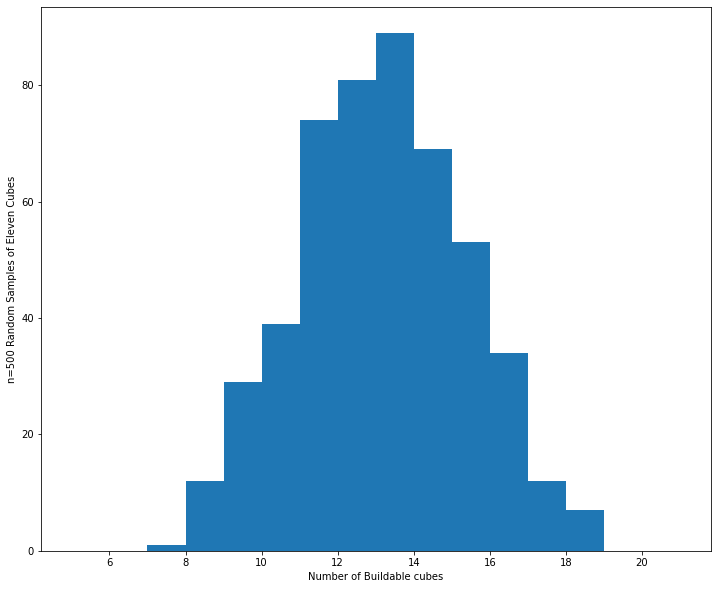

 18 :  7
 17 :  12
 16 :  34
 15 :  53
 14 :  69
 13 :  89
 12 :  81
 11 :  74
 10 :  39
 9 :  29
 8 :  12
 7 :  1
the average number of buildable cubes is 12.664
the standard deviation of the number of buildable cubes is 2.2047280220704333


In [5]:
#Example, distribution of the number of buildable cubes for n=500 sets of 11 cubes
a = DistributionBuildNum4SetsOfEleven(C36, 500)

import statistics

#histogram
fig, ax=plt.subplots(figsize=(12,10))
ax.hist(a, bins=[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])
plt.xlabel("Number of Buildable cubes")
plt.ylabel("n=500 Random Samples of Eleven Cubes")
plt.show()

CountFrequency(a)

print("the average number of buildable cubes is", statistics.mean(a))
print("the standard deviation of the number of buildable cubes is", statistics.stdev(a)) 

# Looking for Minimum Universal Sets of 12

Looking at Haraguchi's set of 12, when one cube is removed then all possible remaining sets of 11 cubes can build at most 18 cubes.  As seen in this analysis, there are sets of 11 that can build up to 21 cubes, but perhaps the min universal sets (if others than the three known sets exist) are found from adding a cube to set of 11 that builds 18 cubes.  We investigate sets of 11 with this property and add cubes to these sets looking for other minimum universal sets. 

In [71]:
#Sets of 11 that build 18 cubes
Set11build18_1 = [[143, 154, 245, 234, 263, 256, 165, 136], [354, 245, 142, 134, 163, 126, 256, 365], [235, 345, 154, 125, 162, 146, 364, 263], [143, 124, 254, 345, 356, 265, 162, 136], [153, 134, 142, 125, 265, 246, 364, 356], [152, 145, 354, 253, 236, 346, 164, 126], [245, 253, 123, 142, 164, 136, 356, 465], [153, 235, 243, 134, 146, 264, 256, 165], [154, 142, 123, 135, 365, 263, 246, 456], [245, 125, 132, 234, 364, 163, 156, 465], [235, 153, 145, 254, 246, 164, 136, 263]]
Set11build18_2 = [[152, 124, 143, 135, 365, 346, 264, 256], [235, 153, 145, 254, 246, 164, 136, 263], [123, 253, 354, 134, 146, 456, 265, 162], [245, 354, 153, 125, 162, 136, 346, 264], [245, 154, 135, 253, 236, 163, 146, 264], [143, 234, 253, 135, 156, 265, 246, 164], [153, 354, 234, 132, 126, 246, 456, 165], [124, 132, 235, 254, 456, 365, 163, 146], [143, 345, 235, 132, 126, 256, 465, 164], [243, 142, 154, 345, 356, 165, 126, 236], [152, 135, 345, 254, 246, 364, 163, 126]]
Set11build18_3 = [[245, 354, 153, 125, 162, 136, 346, 264], [143, 124, 254, 345, 356, 265, 162, 136], [154, 142, 123, 135, 365, 263, 246, 456], [243, 142, 154, 345, 356, 165, 126, 236], [152, 123, 134, 145, 465, 364, 263, 256], [245, 253, 123, 142, 164, 136, 356, 465], [354, 245, 142, 134, 163, 126, 256, 365], [243, 235, 125, 142, 164, 156, 365, 346], [243, 254, 145, 134, 163, 156, 265, 236], [124, 132, 235, 254, 456, 365, 163, 146], [143, 234, 253, 135, 156, 265, 246, 164]]
Set11build18_4 = [[154, 143, 132, 125, 265, 236, 346, 456], [153, 235, 243, 134, 146, 264, 256, 165], [153, 354, 234, 132, 126, 246, 456, 165], [243, 254, 145, 134, 163, 156, 265, 236], [243, 235, 125, 142, 164, 156, 365, 346], [143, 124, 254, 345, 356, 265, 162, 136], [245, 253, 123, 142, 164, 136, 356, 465], [235, 345, 154, 125, 162, 146, 364, 263], [354, 145, 124, 234, 263, 162, 156, 365], [245, 154, 135, 253, 236, 163, 146, 264], [152, 145, 354, 253, 236, 346, 164, 126]]
Set11build18_5 = [[153, 132, 124, 145, 465, 264, 236, 356], [152, 124, 143, 135, 365, 346, 264, 256], [152, 123, 134, 145, 465, 364, 263, 256], [143, 154, 245, 234, 263, 256, 165, 136], [152, 135, 345, 254, 246, 364, 163, 126], [123, 253, 354, 134, 146, 456, 265, 162], [243, 235, 125, 142, 164, 156, 365, 346], [153, 354, 234, 132, 126, 246, 456, 165], [123, 243, 345, 135, 156, 465, 264, 162], [243, 123, 152, 254, 456, 165, 136, 346], [143, 234, 253, 135, 156, 265, 246, 164]]
Set11build18_6 = [[123, 243, 345, 135, 156, 465, 264, 162], [243, 123, 152, 254, 456, 165, 136, 346], [123, 253, 354, 134, 146, 456, 265, 162], [152, 145, 354, 253, 236, 346, 164, 126], [235, 153, 145, 254, 246, 164, 136, 263], [243, 235, 125, 142, 164, 156, 365, 346], [152, 124, 143, 135, 365, 346, 264, 256], [143, 124, 254, 345, 356, 265, 162, 136], [153, 134, 142, 125, 265, 246, 364, 356], [243, 142, 154, 345, 356, 165, 126, 236], [245, 125, 132, 234, 364, 163, 156, 465]]
Set11build18_7 = [[152, 124, 143, 135, 365, 346, 264, 256], [153, 132, 124, 145, 465, 264, 236, 356], [153, 354, 234, 132, 126, 246, 456, 165], [152, 145, 354, 253, 236, 346, 164, 126], [124, 132, 235, 254, 456, 365, 163, 146], [243, 254, 145, 134, 163, 156, 265, 236], [153, 134, 142, 125, 265, 246, 364, 356], [245, 354, 153, 125, 162, 136, 346, 264], [143, 154, 245, 234, 263, 256, 165, 136], [143, 234, 253, 135, 156, 265, 246, 164], [123, 243, 345, 135, 156, 465, 264, 162]]
print(len(Set11build18_1))

11


In [72]:
def complementCubes(set_of_cubes, dictionary):
    list_complement =[]
    for a_key in dictionary.keys():
        if dictionary[a_key] not in set_of_cubes:
            list_complement.append(dictionary[a_key])
    return list_complement

In [11]:
complementCubes(Set11build18_1, C36)

[[123, 253, 354, 134, 146, 456, 265, 162],
 [152, 123, 134, 145, 465, 364, 263, 256],
 [123, 243, 345, 135, 156, 465, 264, 162],
 [243, 123, 152, 254, 456, 165, 136, 346],
 [152, 124, 143, 135, 365, 346, 264, 256],
 [354, 145, 124, 234, 263, 162, 156, 365],
 [153, 132, 124, 145, 465, 264, 236, 356],
 [124, 152, 253, 234, 364, 356, 165, 146],
 [124, 132, 235, 254, 456, 365, 163, 146],
 [245, 354, 153, 125, 162, 136, 346, 264],
 [154, 143, 132, 125, 265, 236, 346, 456],
 [243, 235, 125, 142, 164, 156, 365, 346],
 [152, 135, 345, 254, 246, 364, 163, 126],
 [143, 345, 235, 132, 126, 256, 465, 164],
 [243, 142, 154, 345, 356, 165, 126, 236],
 [153, 354, 234, 132, 126, 246, 456, 165],
 [243, 254, 145, 134, 163, 156, 265, 236],
 [245, 154, 135, 253, 236, 163, 146, 264],
 [143, 234, 253, 135, 156, 265, 246, 164]]

In [75]:
def Check11plusForMinUniv(set_of_11cubes, dictionary):
    initial_set11 = set_of_11cubes.copy()
    print(len(set_of_11cubes))
    complmnt = complementCubes(set_of_11cubes, dictionary)
    num_buildable = []
    #lisTwelve =[]
    
    for cube in complmnt:
        initial_set11.append(cube)
        print(len(initial_set11))
        DisplaySetCubesandBuildableTargets(CubeCornersToNames(initial_set11, dictionary), dictionary)
        a=NumberBuildable4SetsSizeK(initial_set11, dictionary)
        print("the number of buildable cubes is", a)
        num_buildable.append(a)
        if a == 30:
            print("FOUND ONE!",initial_set11)
        initial_set11 = set_of_11cubes.copy() 
    
    return CountFrequency(num_buildable)
    

11
12
these 24 cubes are Buildable:
['123.465', '123.546', '123.564', '123.645', '123.654', '124.356', '124.365', '124.536', '124.635', '124.653', '125.346', '125.364', '125.463', '125.643', '126.345', '126.354', '126.435', '126.453', '126.543', '134.526', '134.625', '135.426', '135.624', '136.425']
the original set of cubes


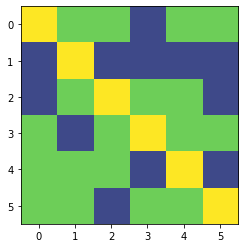

the set of buildable targets


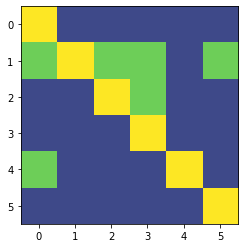

the number of buildable cubes is 24
12
these 22 cubes are Buildable:
['123.465', '123.546', '123.564', '123.645', '123.654', '124.356', '124.365', '124.536', '124.635', '125.346', '125.364', '125.463', '125.643', '126.354', '126.435', '126.453', '126.534', '134.526', '134.625', '135.426', '135.624', '136.425']
the original set of cubes


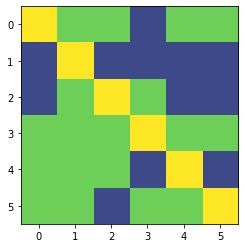

the set of buildable targets


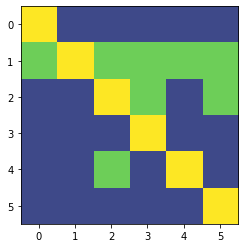

the number of buildable cubes is 22
12
these 21 cubes are Buildable:
['123.465', '123.546', '123.564', '123.645', '123.654', '124.356', '124.365', '124.536', '124.635', '124.653', '125.346', '125.463', '125.643', '126.345', '126.435', '126.453', '126.534', '134.526', '134.625', '135.624', '136.425']
the original set of cubes


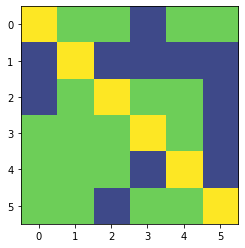

the set of buildable targets


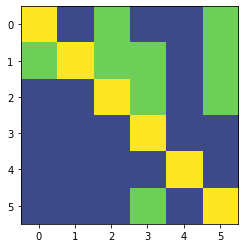

the number of buildable cubes is 21
12
these 21 cubes are Buildable:
['123.465', '123.546', '123.564', '123.645', '123.654', '124.356', '124.365', '124.536', '124.635', '124.653', '125.346', '125.463', '125.643', '126.354', '126.435', '126.453', '126.543', '134.526', '134.625', '135.624', '136.425']
the original set of cubes


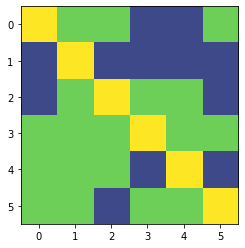

the set of buildable targets


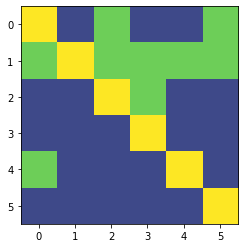

the number of buildable cubes is 21
12
these 22 cubes are Buildable:
['123.465', '123.546', '123.564', '123.645', '123.654', '124.356', '124.365', '124.536', '124.635', '124.653', '125.346', '125.463', '125.643', '126.345', '126.435', '126.453', '126.534', '126.543', '134.526', '134.625', '135.624', '136.425']
the original set of cubes


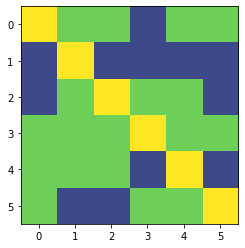

the set of buildable targets


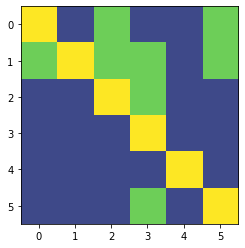

the number of buildable cubes is 22
12
these 22 cubes are Buildable:
['123.465', '123.546', '123.564', '123.645', '123.654', '124.356', '124.365', '124.536', '124.635', '124.653', '125.346', '125.463', '125.643', '126.345', '126.354', '126.435', '126.453', '126.543', '134.526', '134.625', '135.624', '136.425']
the original set of cubes


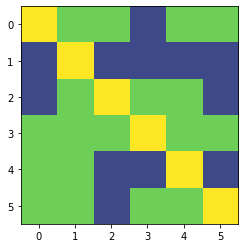

the set of buildable targets


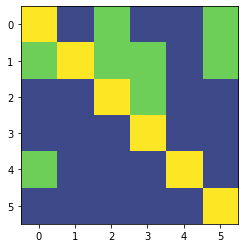

the number of buildable cubes is 22
12
these 22 cubes are Buildable:
['123.465', '123.546', '123.564', '123.645', '123.654', '124.356', '124.365', '124.536', '124.635', '125.346', '125.364', '125.463', '125.643', '126.354', '126.435', '126.453', '126.543', '134.526', '134.625', '135.426', '135.624', '136.425']
the original set of cubes


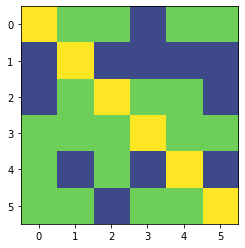

the set of buildable targets


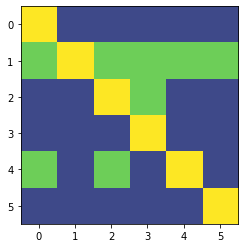

the number of buildable cubes is 22
12
these 23 cubes are Buildable:
['123.465', '123.546', '123.564', '123.645', '123.654', '124.356', '124.365', '124.536', '124.635', '125.346', '125.364', '125.463', '125.643', '126.345', '126.354', '126.435', '126.453', '126.534', '126.543', '134.526', '134.625', '135.624', '136.425']
the original set of cubes


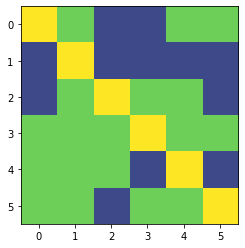

the set of buildable targets


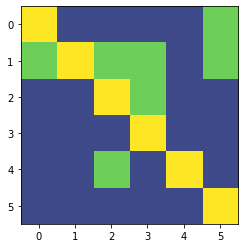

the number of buildable cubes is 23
12
these 22 cubes are Buildable:
['123.465', '123.546', '123.564', '123.645', '123.654', '124.356', '124.365', '124.536', '124.635', '124.653', '125.346', '125.364', '125.463', '125.643', '126.345', '126.435', '126.453', '134.526', '134.625', '135.426', '135.624', '136.425']
the original set of cubes


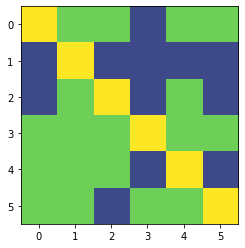

the set of buildable targets


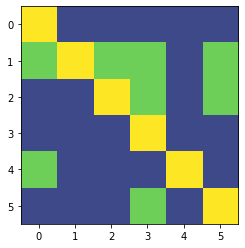

the number of buildable cubes is 22
12
these 23 cubes are Buildable:
['123.465', '123.546', '123.564', '123.645', '123.654', '124.356', '124.365', '124.536', '124.635', '124.653', '125.346', '125.364', '125.463', '125.643', '126.435', '126.453', '126.534', '126.543', '134.526', '134.625', '135.426', '135.624', '136.425']
the original set of cubes


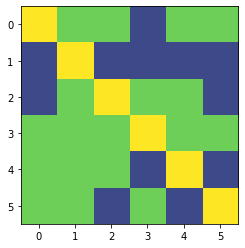

the set of buildable targets


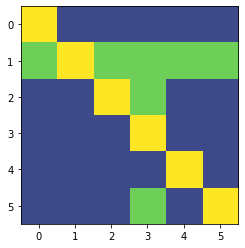

the number of buildable cubes is 23
12
these 24 cubes are Buildable:
['123.465', '123.546', '123.564', '123.645', '123.654', '124.356', '124.365', '124.536', '124.635', '124.653', '125.346', '125.364', '125.463', '125.643', '126.345', '126.354', '126.435', '126.453', '126.543', '134.526', '134.625', '135.426', '135.624', '136.425']
the original set of cubes


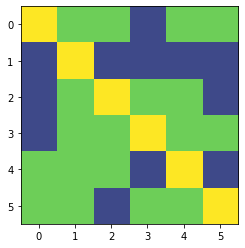

the set of buildable targets


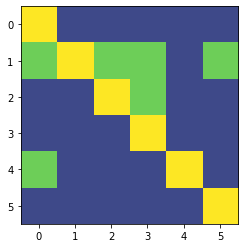

the number of buildable cubes is 24
12
these 24 cubes are Buildable:
['123.465', '123.546', '123.564', '123.645', '123.654', '124.356', '124.365', '124.536', '124.635', '124.653', '125.346', '125.364', '125.463', '125.643', '126.345', '126.354', '126.435', '126.453', '126.543', '134.526', '134.625', '135.426', '135.624', '136.425']
the original set of cubes


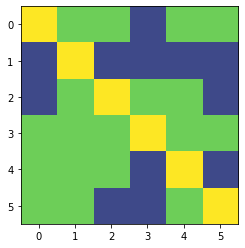

the set of buildable targets


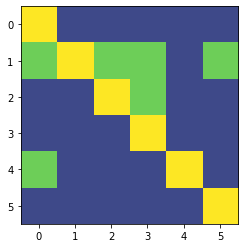

the number of buildable cubes is 24
12
these 22 cubes are Buildable:
['123.465', '123.546', '123.564', '123.645', '123.654', '124.356', '124.365', '124.536', '124.635', '125.346', '125.463', '125.643', '126.345', '126.354', '126.435', '126.453', '126.534', '126.543', '134.526', '134.625', '135.624', '136.425']
the original set of cubes


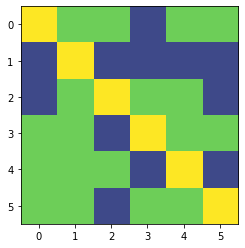

the set of buildable targets


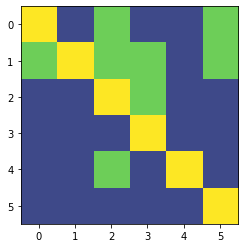

the number of buildable cubes is 22
12
these 22 cubes are Buildable:
['123.465', '123.546', '123.564', '123.645', '123.654', '124.356', '124.365', '124.536', '124.635', '124.653', '125.346', '125.463', '125.643', '126.345', '126.354', '126.435', '126.453', '126.543', '134.526', '134.625', '135.624', '136.425']
the original set of cubes


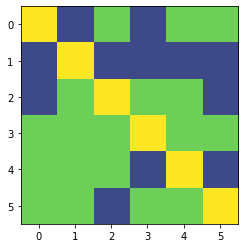

the set of buildable targets


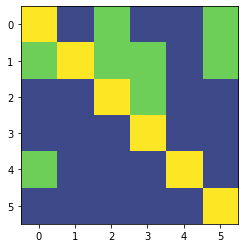

the number of buildable cubes is 22
12
these 24 cubes are Buildable:
['123.465', '123.546', '123.564', '123.645', '123.654', '124.356', '124.365', '124.536', '124.635', '125.346', '125.364', '125.463', '125.643', '126.345', '126.354', '126.435', '126.453', '126.534', '126.543', '134.526', '134.625', '135.426', '135.624', '136.425']
the original set of cubes


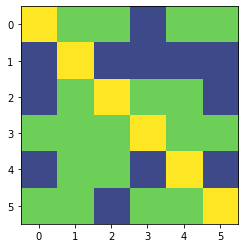

the set of buildable targets


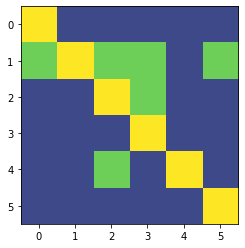

the number of buildable cubes is 24
12
these 22 cubes are Buildable:
['123.465', '123.546', '123.564', '123.645', '123.654', '124.356', '124.365', '124.536', '124.635', '124.653', '125.346', '125.463', '125.643', '126.345', '126.354', '126.435', '126.453', '126.534', '134.526', '134.625', '135.624', '136.425']
the original set of cubes


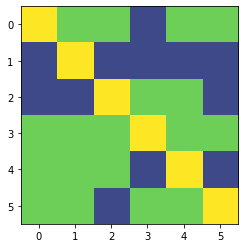

the set of buildable targets


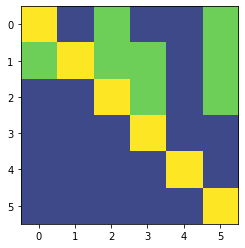

the number of buildable cubes is 22
12
these 21 cubes are Buildable:
['123.465', '123.546', '123.564', '123.645', '123.654', '124.356', '124.365', '124.536', '124.635', '124.653', '125.346', '125.463', '125.643', '126.354', '126.435', '126.453', '126.543', '134.526', '134.625', '135.624', '136.425']
the original set of cubes


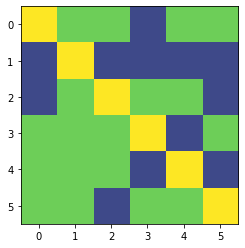

the set of buildable targets


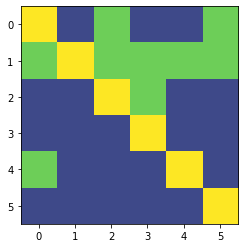

the number of buildable cubes is 21
12
these 23 cubes are Buildable:
['123.465', '123.546', '123.564', '123.645', '123.654', '124.356', '124.365', '124.536', '124.635', '124.653', '125.346', '125.463', '125.643', '126.345', '126.354', '126.435', '126.453', '126.534', '134.526', '134.625', '135.426', '135.624', '136.425']
the original set of cubes


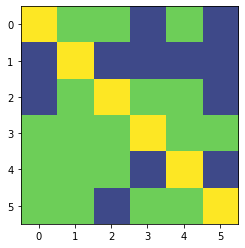

the set of buildable targets


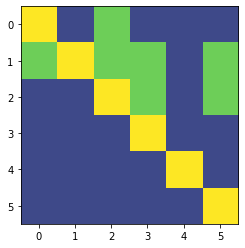

the number of buildable cubes is 23
12
these 21 cubes are Buildable:
['123.465', '123.546', '123.564', '123.645', '123.654', '124.356', '124.365', '124.536', '124.635', '124.653', '125.346', '125.463', '125.643', '126.345', '126.435', '126.453', '126.543', '134.526', '134.625', '135.624', '136.425']
the original set of cubes


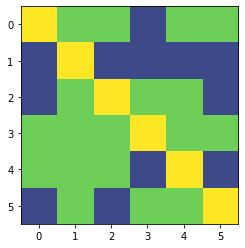

the set of buildable targets


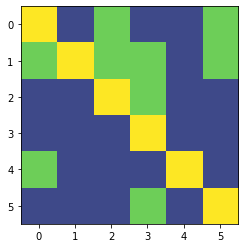

the number of buildable cubes is 21
 24 :  4
 23 :  3
 22 :  8
 21 :  4


In [87]:
Check11plusForMinUniv(Set11build18_5, C36)
#print(len(Set11build18_1))
#print(Set11build18_1)

## distribution from sets of 11 that build 18

Set11build18_1 <br>
#buildable : #sets of 12<br>
24 :  1<br>
 23 :  3<br>
 22 :  5<br>
 21 :  7<br>
 20 :  3<br>
 
Set11build18_2 <br>
#buildable : #sets of 12<br>
 24 :  4<br>
 23 :  4<br>
 22 :  5<br>
 21 :  4<br>
 20 :  2<br>
 
 Set11build18_3 <br>
#buildable : #sets of 12<br>
 24 :  1<br>
 23 :  1<br>
 22 :  8<br>
 21 :  5<br>
 20 :  4<br>
 
  Set11build18_4 <br>
#buildable : #sets of 12<br>
 24 :  2<br>
 23 :  3<br>
 22 :  7<br>
 21 :  5<br>
 20 :  2<br>
 
   Set11build18_5 <br>
#buildable : #sets of 12<br>
 24 :  4<br>
 23 :  3<br>
 22 :  8<br>
 21 :  4<br>
 
   Set11build18_6 <br>
#buildable : #sets of 12<br>
 23 :  6<br>
 22 :  2<br>
 21 :  6<br>
 20 :  3<br>
 19 :  2<br>


## Conjecture: A set of 11 cubes in C36 can build no more than 21 targets.

## These sets of eleven cubes can build 21 target cubes!!!


In [6]:
#These sets of eleven cubes build 21 target cubes

Elev1 = [[354, 245, 142, 134, 163, 126, 256, 365], [235, 345, 154, 125, 162, 146, 364, 263], [123, 243, 345, 135, 156, 465, 264, 162], [245, 125, 132, 234, 364, 163, 156, 465], [354, 145, 124, 234, 263, 162, 156, 365], [243, 254, 145, 134, 163, 156, 265, 236], [153, 354, 234, 132, 126, 246, 456, 165], [245, 253, 123, 142, 164, 136, 356, 465], [124, 152, 253, 234, 364, 356, 165, 146], [152, 124, 143, 135, 365, 346, 264, 256], [152, 135, 345, 254, 246, 364, 163, 126]]
Elev2 = [[152, 124, 143, 135, 365, 346, 264, 256], [154, 143, 132, 125, 265, 236, 346, 456], [154, 142, 123, 135, 365, 263, 246, 456], [245, 253, 123, 142, 164, 136, 356, 465], [152, 145, 354, 253, 236, 346, 164, 126], [123, 253, 354, 134, 146, 456, 265, 162], [143, 124, 254, 345, 356, 265, 162, 136], [235, 345, 154, 125, 162, 146, 364, 263], [243, 254, 145, 134, 163, 156, 265, 236], [243, 142, 154, 345, 356, 165, 126, 236], [153, 354, 234, 132, 126, 246, 456, 165]]
Elev3 = [[154, 142, 123, 135, 365, 263, 246, 456], [124, 132, 235, 254, 456, 365, 163, 146], [154, 143, 132, 125, 265, 236, 346, 456], [245, 154, 135, 253, 236, 163, 146, 264], [152, 145, 354, 253, 236, 346, 164, 126], [245, 125, 132, 234, 364, 163, 156, 465], [143, 345, 235, 132, 126, 256, 465, 164], [243, 123, 152, 254, 456, 165, 136, 346], [143, 154, 245, 234, 263, 256, 165, 136], [143, 124, 254, 345, 356, 265, 162, 136], [153, 235, 243, 134, 146, 264, 256, 165]]
Elev4 =[[152, 135, 345, 254, 246, 364, 163, 126], [245, 253, 123, 142, 164, 136, 356, 465], [354, 145, 124, 234, 263, 162, 156, 365], [154, 143, 132, 125, 265, 236, 346, 456], [152, 145, 354, 253, 236, 346, 164, 126], [154, 142, 123, 135, 365, 263, 246, 456], [245, 154, 135, 253, 236, 163, 146, 264], [152, 123, 134, 145, 465, 364, 263, 256], [243, 235, 125, 142, 164, 156, 365, 346], [153, 235, 243, 134, 146, 264, 256, 165], [152, 124, 143, 135, 365, 346, 264, 256]]
Elev5 = [[243, 142, 154, 345, 356, 165, 126, 236], [124, 132, 235, 254, 456, 365, 163, 146], [154, 142, 123, 135, 365, 263, 246, 456], [152, 123, 134, 145, 465, 364, 263, 256], [243, 254, 145, 134, 163, 156, 265, 236], [245, 154, 135, 253, 236, 163, 146, 264], [143, 124, 254, 345, 356, 265, 162, 136], [235, 153, 145, 254, 246, 164, 136, 263], [245, 354, 153, 125, 162, 136, 346, 264], [143, 234, 253, 135, 156, 265, 246, 164], [152, 124, 143, 135, 365, 346, 264, 256]]
Elev6 = [[245, 253, 123, 142, 164, 136, 356, 465], [143, 345, 235, 132, 126, 256, 465, 164], [154, 143, 132, 125, 265, 236, 346, 456], [354, 245, 142, 134, 163, 126, 256, 365], [123, 243, 345, 135, 156, 465, 264, 162], [354, 145, 124, 234, 263, 162, 156, 365], [124, 152, 253, 234, 364, 356, 165, 146], [154, 142, 123, 135, 365, 263, 246, 456], [153, 132, 124, 145, 465, 264, 236, 356], [235, 153, 145, 254, 246, 164, 136, 263], [235, 345, 154, 125, 162, 146, 364, 263]]

## What is the relationship between the 11 cubes and the 21 cubes that they build?

Below we represent the sets of eleven (in navy) and underneath the sets of 21 buildable cubes (in navy)

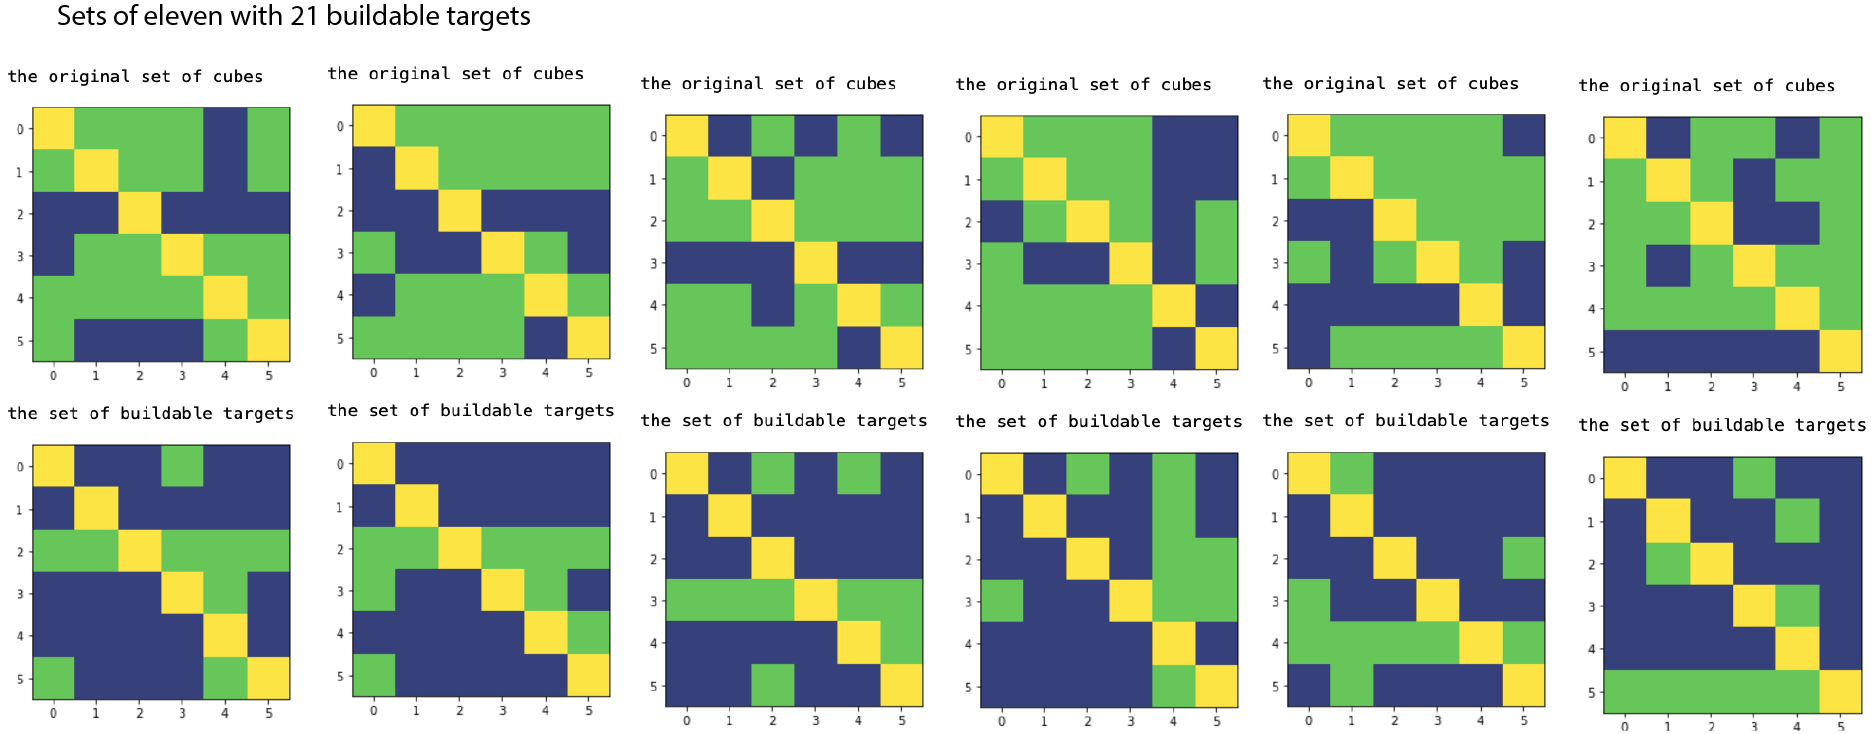

In [6]:
from IPython.display import Image
Image(filename="./SetsElevenWith21Buildable.png")

these cubes are Buildable:
['123.456', '123.465', '123.564', '123.654', '124.356', '124.365', '124.536', '124.563', '124.653', '125.346', '125.364', '125.436', '125.634', '125.643', '126.435', '126.453', '126.534', '126.543', '135.426', '135.624', '136.524']
the original set of cubes


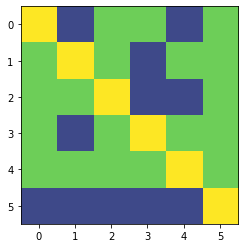

the set of buildable targets


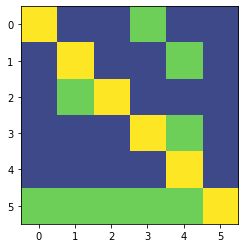

In [12]:
#A set of eleven cubes that builds 21 target cubes
Elev1Names = CubeCornersToNames(Elev6, C36)
DisplaySetCubesandBuildableTargets(Elev1Names, C36)

## Sets of 11 cubes that build 20 targets (21 is max number of buildable)

The tableau is depicted in green with the selected cubes in dark blue and blank diagonal entries in yellow.

In [38]:
#ElevenCubesBuild20Targets 
Eleven1 = [[354, 245, 142, 134, 163, 126, 256, 365], [152, 135, 345, 254, 246, 364, 163, 126], [154, 143, 132, 125, 265, 236, 346, 456], [153, 132, 124, 145, 465, 264, 236, 356], [235, 345, 154, 125, 162, 146, 364, 263], [354, 145, 124, 234, 263, 162, 156, 365], [153, 134, 142, 125, 265, 246, 364, 356], [243, 123, 152, 254, 456, 165, 136, 346], [143, 234, 253, 135, 156, 265, 246, 164], [245, 154, 135, 253, 236, 163, 146, 264], [243, 254, 145, 134, 163, 156, 265, 236]]
Eleven2 = [[154, 142, 123, 135, 365, 263, 246, 456], [123, 253, 354, 134, 146, 456, 265, 162], [243, 235, 125, 142, 164, 156, 365, 346], [152, 123, 134, 145, 465, 364, 263, 256], [245, 154, 135, 253, 236, 163, 146, 264], [243, 123, 152, 254, 456, 165, 136, 346], [153, 132, 124, 145, 465, 264, 236, 356], [152, 145, 354, 253, 236, 346, 164, 126], [143, 124, 254, 345, 356, 265, 162, 136], [153, 134, 142, 125, 265, 246, 364, 356], [124, 152, 253, 234, 364, 356, 165, 146]]
Eleven3 = [[152, 145, 354, 253, 236, 346, 164, 126], [152, 123, 134, 145, 465, 364, 263, 256], [124, 132, 235, 254, 456, 365, 163, 146], [153, 235, 243, 134, 146, 264, 256, 165], [123, 253, 354, 134, 146, 456, 265, 162], [245, 125, 132, 234, 364, 163, 156, 465], [354, 145, 124, 234, 263, 162, 156, 365], [153, 134, 142, 125, 265, 246, 364, 356], [123, 243, 345, 135, 156, 465, 264, 162], [143, 154, 245, 234, 263, 256, 165, 136], [243, 235, 125, 142, 164, 156, 365, 346]]
Eleven4 = [[123, 243, 345, 135, 156, 465, 264, 162], [153, 235, 243, 134, 146, 264, 256, 165], [143, 345, 235, 132, 126, 256, 465, 164], [245, 125, 132, 234, 364, 163, 156, 465], [245, 253, 123, 142, 164, 136, 356, 465], [245, 354, 153, 125, 162, 136, 346, 264], [153, 134, 142, 125, 265, 246, 364, 356], [154, 142, 123, 135, 365, 263, 246, 456], [235, 153, 145, 254, 246, 164, 136, 263], [124, 152, 253, 234, 364, 356, 165, 146], [243, 254, 145, 134, 163, 156, 265, 236]]

In [5]:
#now in module2x2x2
def CubeCornersToNames(listOfcornernumbers, dictionary):
    list_of_names=[]
    for lis in listOfcornernumbers:
        a=find_key(dictionary, lis)
        list_of_names.append(a)   
        
    return list_of_names

these cubes are Buildable:
['123.456', '123.465', '123.546', '123.564', '124.356', '124.365', '124.635', '124.653', '125.346', '125.364', '125.463', '125.634', '125.643', '126.345', '126.435', '126.534', '126.543', '134.526', '135.426', '136.425']
the original set of cubes


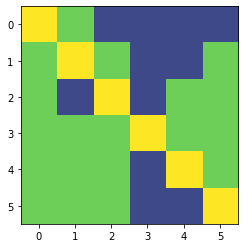

the set of buildable targets


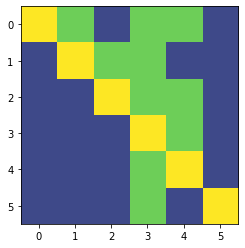

In [37]:
ElevenNames1 = CubeCornersToNames(Eleven1, C36)
DisplaySetCubesandBuildableTargets(ElevenNames1, C36)

these cubes are Buildable:
['123.456', '123.465', '123.546', '123.645', '123.654', '124.365', '124.536', '124.635', '124.653', '125.346', '125.364', '125.436', '125.463', '126.345', '126.435', '126.534', '134.526', '134.625', '135.624', '136.425']
the original set of cubes


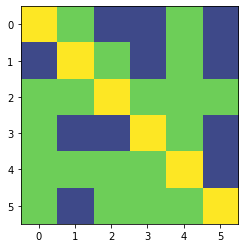

the set of buildable targets


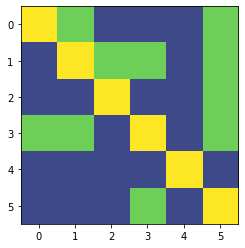

In [40]:
ElevenNames2 = CubeCornersToNames(Eleven2, C36)
DisplaySetCubesandBuildableTargets(ElevenNames2, C36)

these cubes are Buildable:
['123.456', '123.465', '123.564', '123.645', '123.654', '124.365', '124.536', '124.563', '124.635', '125.346', '125.436', '125.634', '125.643', '126.354', '126.453', '126.543', '134.526', '134.625', '135.624', '136.425']
the original set of cubes


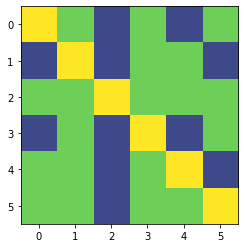

the set of buildable targets


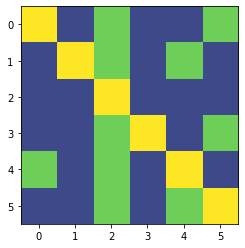

In [41]:
ElevenNames3 = CubeCornersToNames(Eleven3, C36)
DisplaySetCubesandBuildableTargets(ElevenNames3, C36)

these cubes are Buildable:
['123.456', '123.465', '123.546', '123.645', '123.654', '124.356', '124.563', '125.364', '125.436', '125.634', '125.643', '126.345', '126.354', '126.534', '126.543', '134.625', '135.426', '135.624', '136.425', '136.524']
the original set of cubes


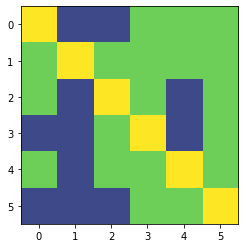

the set of buildable targets


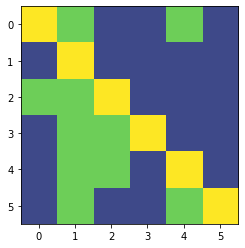

In [42]:
ElevenNames4 = CubeCornersToNames(Eleven4, C36)
DisplaySetCubesandBuildableTargets(ElevenNames4, C36)


Here are several examples that build 20 targets.
<br>
**These 11 cubes build 20 targets** 
these build 20 [[154, 143, 132, 125, 265, 236, 346, 456], [143, 154, 245, 234, 263, 256, 165, 136], [143, 124, 254, 345, 356, 265, 162, 136], [124, 152, 253, 234, 364, 356, 165, 146], [123, 243, 345, 135, 156, 465, 264, 162], [243, 235, 125, 142, 164, 156, 365, 346], [143, 345, 235, 132, 126, 256, 465, 164], [153, 134, 142, 125, 265, 246, 364, 356], [354, 245, 142, 134, 163, 126, 256, 365], [235, 153, 145, 254, 246, 164, 136, 263], [154, 142, 123, 135, 365, 263, 246, 456]]
these build 20 [[153, 132, 124, 145, 465, 264, 236, 356], [123, 253, 354, 134, 146, 456, 265, 162], [243, 235, 125, 142, 164, 156, 365, 346], [245, 125, 132, 234, 364, 163, 156, 465], [152, 135, 345, 254, 246, 364, 163, 126], [245, 253, 123, 142, 164, 136, 356, 465], [354, 245, 142, 134, 163, 126, 256, 365], [153, 235, 243, 134, 146, 264, 256, 165], [143, 154, 245, 234, 263, 256, 165, 136], [153, 354, 234, 132, 126, 246, 456, 165], [235, 153, 145, 254, 246, 164, 136, 263]]
these build 20 [[152, 123, 134, 145, 465, 364, 263, 256], [243, 254, 145, 134, 163, 156, 265, 236], [354, 145, 124, 234, 263, 162, 156, 365], [235, 345, 154, 125, 162, 146, 364, 263], [245, 154, 135, 253, 236, 163, 146, 264], [124, 152, 253, 234, 364, 356, 165, 146], [153, 134, 142, 125, 265, 246, 364, 356], [154, 142, 123, 135, 365, 263, 246, 456], [245, 354, 153, 125, 162, 136, 346, 264], [143, 345, 235, 132, 126, 256, 465, 164], [143, 234, 253, 135, 156, 265, 246, 164]]
these build 20 [[143, 124, 254, 345, 356, 265, 162, 136], [245, 154, 135, 253, 236, 163, 146, 264], [243, 123, 152, 254, 456, 165, 136, 346], [154, 142, 123, 135, 365, 263, 246, 456], [152, 145, 354, 253, 236, 346, 164, 126], [243, 235, 125, 142, 164, 156, 365, 346], [124, 152, 253, 234, 364, 356, 165, 146], [153, 354, 234, 132, 126, 246, 456, 165], [354, 245, 142, 134, 163, 126, 256, 365], [152, 123, 134, 145, 465, 364, 263, 256], [153, 134, 142, 125, 265, 246, 364, 356]]
these build 20 [[124, 152, 253, 234, 364, 356, 165, 146], [143, 124, 254, 345, 356, 265, 162, 136], [245, 125, 132, 234, 364, 163, 156, 465], [143, 345, 235, 132, 126, 256, 465, 164], [153, 235, 243, 134, 146, 264, 256, 165], [153, 134, 142, 125, 265, 246, 364, 356], [123, 243, 345, 135, 156, 465, 264, 162], [152, 145, 354, 253, 236, 346, 164, 126], [143, 154, 245, 234, 263, 256, 165, 136], [354, 145, 124, 234, 263, 162, 156, 365], [124, 132, 235, 254, 456, 365, 163, 146]]
these build 20 [[235, 345, 154, 125, 162, 146, 364, 263], [243, 123, 152, 254, 456, 165, 136, 346], [354, 245, 142, 134, 163, 126, 256, 365], [143, 234, 253, 135, 156, 265, 246, 164], [245, 253, 123, 142, 164, 136, 356, 465], [153, 132, 124, 145, 465, 264, 236, 356], [153, 235, 243, 134, 146, 264, 256, 165], [153, 134, 142, 125, 265, 246, 364, 356], [152, 135, 345, 254, 246, 364, 163, 126], [154, 143, 132, 125, 265, 236, 346, 456], [354, 145, 124, 234, 263, 162, 156, 365]]
these build 20 [[153, 134, 142, 125, 265, 246, 364, 356], [245, 125, 132, 234, 364, 163, 156, 465], [123, 253, 354, 134, 146, 456, 265, 162], [124, 152, 253, 234, 364, 356, 165, 146], [354, 245, 142, 134, 163, 126, 256, 365], [143, 345, 235, 132, 126, 256, 465, 164], [152, 124, 143, 135, 365, 346, 264, 256], [143, 154, 245, 234, 263, 256, 165, 136], [235, 153, 145, 254, 246, 164, 136, 263], [153, 132, 124, 145, 465, 264, 236, 356], [243, 142, 154, 345, 356, 165, 126, 236]]
these build 20 [[243, 123, 152, 254, 456, 165, 136, 346], [245, 125, 132, 234, 364, 163, 156, 465], [154, 142, 123, 135, 365, 263, 246, 456], [152, 124, 143, 135, 365, 346, 264, 256], [143, 234, 253, 135, 156, 265, 246, 164], [143, 124, 254, 345, 356, 265, 162, 136], [354, 245, 142, 134, 163, 126, 256, 365], [235, 345, 154, 125, 162, 146, 364, 263], [153, 132, 124, 145, 465, 264, 236, 356], [152, 135, 345, 254, 246, 364, 163, 126], [235, 153, 145, 254, 246, 164, 136, 263]]
these build 20 [[153, 132, 124, 145, 465, 264, 236, 356], [143, 154, 245, 234, 263, 256, 165, 136], [154, 142, 123, 135, 365, 263, 246, 456], [153, 354, 234, 132, 126, 246, 456, 165], [235, 345, 154, 125, 162, 146, 364, 263], [154, 143, 132, 125, 265, 236, 346, 456], [245, 253, 123, 142, 164, 136, 356, 465], [243, 254, 145, 134, 163, 156, 265, 236], [354, 145, 124, 234, 263, 162, 156, 365], [153, 235, 243, 134, 146, 264, 256, 165], [152, 124, 143, 135, 365, 346, 264, 256]]
these build 20 [[153, 354, 234, 132, 126, 246, 456, 165], [153, 134, 142, 125, 265, 246, 364, 356], [235, 153, 145, 254, 246, 164, 136, 263], [143, 345, 235, 132, 126, 256, 465, 164], [123, 243, 345, 135, 156, 465, 264, 162], [143, 234, 253, 135, 156, 265, 246, 164], [354, 245, 142, 134, 163, 126, 256, 365], [124, 152, 253, 234, 364, 356, 165, 146], [245, 154, 135, 253, 236, 163, 146, 264], [143, 124, 254, 345, 356, 265, 162, 136], [154, 143, 132, 125, 265, 236, 346, 456]]
these build 20 [[243, 142, 154, 345, 356, 165, 126, 236], [143, 345, 235, 132, 126, 256, 465, 164], [152, 135, 345, 254, 246, 364, 163, 126], [143, 154, 245, 234, 263, 256, 165, 136], [235, 153, 145, 254, 246, 164, 136, 263], [354, 145, 124, 234, 263, 162, 156, 365], [243, 123, 152, 254, 456, 165, 136, 346], [245, 154, 135, 253, 236, 163, 146, 264], [123, 253, 354, 134, 146, 456, 265, 162], [143, 124, 254, 345, 356, 265, 162, 136], [153, 134, 142, 125, 265, 246, 364, 356]]
these build 20 [[154, 142, 123, 135, 365, 263, 246, 456], [245, 253, 123, 142, 164, 136, 356, 465], [143, 154, 245, 234, 263, 256, 165, 136], [243, 254, 145, 134, 163, 156, 265, 236], [154, 143, 132, 125, 265, 236, 346, 456], [143, 345, 235, 132, 126, 256, 465, 164], [124, 152, 253, 234, 364, 356, 165, 146], [243, 235, 125, 142, 164, 156, 365, 346], [124, 132, 235, 254, 456, 365, 163, 146], [245, 354, 153, 125, 162, 136, 346, 264], [153, 354, 234, 132, 126, 246, 456, 165]]
these build 20 [[245, 253, 123, 142, 164, 136, 356, 465], [153, 235, 243, 134, 146, 264, 256, 165], [354, 145, 124, 234, 263, 162, 156, 365], [153, 354, 234, 132, 126, 246, 456, 165], [235, 153, 145, 254, 246, 164, 136, 263], [245, 125, 132, 234, 364, 163, 156, 465], [243, 123, 152, 254, 456, 165, 136, 346], [152, 123, 134, 145, 465, 364, 263, 256], [243, 142, 154, 345, 356, 165, 126, 236], [154, 142, 123, 135, 365, 263, 246, 456], [143, 124, 254, 345, 356, 265, 162, 136]]
these build 20 [[152, 135, 345, 254, 246, 364, 163, 126], [124, 152, 253, 234, 364, 356, 165, 146], [235, 153, 145, 254, 246, 164, 136, 263], [354, 245, 142, 134, 163, 126, 256, 365], [143, 234, 253, 135, 156, 265, 246, 164], [123, 243, 345, 135, 156, 465, 264, 162], [153, 235, 243, 134, 146, 264, 256, 165], [243, 235, 125, 142, 164, 156, 365, 346], [153, 132, 124, 145, 465, 264, 236, 356], [154, 143, 132, 125, 265, 236, 346, 456], [143, 154, 245, 234, 263, 256, 165, 136]]
these build 20 [[354, 145, 124, 234, 263, 162, 156, 365], [152, 124, 143, 135, 365, 346, 264, 256], [153, 134, 142, 125, 265, 246, 364, 356], [143, 124, 254, 345, 356, 265, 162, 136], [123, 253, 354, 134, 146, 456, 265, 162], [243, 235, 125, 142, 164, 156, 365, 346], [123, 243, 345, 135, 156, 465, 264, 162], [153, 354, 234, 132, 126, 246, 456, 165], [124, 152, 253, 234, 364, 356, 165, 146], [243, 254, 145, 134, 163, 156, 265, 236], [245, 154, 135, 253, 236, 163, 146, 264]]
these build 20 [[154, 143, 132, 125, 265, 236, 346, 456], [245, 154, 135, 253, 236, 163, 146, 264], [243, 254, 145, 134, 163, 156, 265, 236], [153, 134, 142, 125, 265, 246, 364, 356], [235, 345, 154, 125, 162, 146, 364, 263], [123, 243, 345, 135, 156, 465, 264, 162], [152, 123, 134, 145, 465, 364, 263, 256], [153, 354, 234, 132, 126, 246, 456, 165], [152, 124, 143, 135, 365, 346, 264, 256], [245, 253, 123, 142, 164, 136, 356, 465], [243, 142, 154, 345, 356, 165, 126, 236]]
these build 20 [[152, 124, 143, 135, 365, 346, 264, 256], [154, 142, 123, 135, 365, 263, 246, 456], [245, 253, 123, 142, 164, 136, 356, 465], [123, 243, 345, 135, 156, 465, 264, 162], [123, 253, 354, 134, 146, 456, 265, 162], [235, 153, 145, 254, 246, 164, 136, 263], [243, 142, 154, 345, 356, 165, 126, 236], [354, 245, 142, 134, 163, 126, 256, 365], [354, 145, 124, 234, 263, 162, 156, 365], [154, 143, 132, 125, 265, 236, 346, 456], [245, 125, 132, 234, 364, 163, 156, 465]]
these build 20 [[243, 123, 152, 254, 456, 165, 136, 346], [354, 145, 124, 234, 263, 162, 156, 365], [153, 134, 142, 125, 265, 246, 364, 356], [143, 345, 235, 132, 126, 256, 465, 164], [153, 235, 243, 134, 146, 264, 256, 165], [153, 132, 124, 145, 465, 264, 236, 356], [154, 143, 132, 125, 265, 236, 346, 456], [143, 124, 254, 345, 356, 265, 162, 136], [245, 125, 132, 234, 364, 163, 156, 465], [245, 253, 123, 142, 164, 136, 356, 465], [245, 154, 135, 253, 236, 163, 146, 264]]
these build 20 [[243, 142, 154, 345, 356, 165, 126, 236], [123, 243, 345, 135, 156, 465, 264, 162], [152, 135, 345, 254, 246, 364, 163, 126], [243, 123, 152, 254, 456, 165, 136, 346], [354, 145, 124, 234, 263, 162, 156, 365], [153, 134, 142, 125, 265, 246, 364, 356], [245, 253, 123, 142, 164, 136, 356, 465], [123, 253, 354, 134, 146, 456, 265, 162], [243, 254, 145, 134, 163, 156, 265, 236], [143, 345, 235, 132, 126, 256, 465, 164], [124, 132, 235, 254, 456, 365, 163, 146]]
these build 20 [[123, 253, 354, 134, 146, 456, 265, 162], [143, 345, 235, 132, 126, 256, 465, 164], [123, 243, 345, 135, 156, 465, 264, 162], [153, 132, 124, 145, 465, 264, 236, 356], [143, 124, 254, 345, 356, 265, 162, 136], [354, 245, 142, 134, 163, 126, 256, 365], [152, 123, 134, 145, 465, 364, 263, 256], [124, 152, 253, 234, 364, 356, 165, 146], [243, 254, 145, 134, 163, 156, 265, 236], [154, 142, 123, 135, 365, 263, 246, 456], [154, 143, 132, 125, 265, 236, 346, 456]]
these build 20 [[143, 154, 245, 234, 263, 256, 165, 136], [235, 345, 154, 125, 162, 146, 364, 263], [354, 145, 124, 234, 263, 162, 156, 365], [124, 152, 253, 234, 364, 356, 165, 146], [152, 124, 143, 135, 365, 346, 264, 256], [124, 132, 235, 254, 456, 365, 163, 146], [154, 142, 123, 135, 365, 263, 246, 456], [152, 145, 354, 253, 236, 346, 164, 126], [153, 134, 142, 125, 265, 246, 364, 356], [123, 243, 345, 135, 156, 465, 264, 162], [243, 254, 145, 134, 163, 156, 265, 236]]
these build 20 [[243, 235, 125, 142, 164, 156, 365, 346], [245, 154, 135, 253, 236, 163, 146, 264], [153, 354, 234, 132, 126, 246, 456, 165], [152, 135, 345, 254, 246, 364, 163, 126], [143, 234, 253, 135, 156, 265, 246, 164], [235, 153, 145, 254, 246, 164, 136, 263], [354, 145, 124, 234, 263, 162, 156, 365], [123, 253, 354, 134, 146, 456, 265, 162], [152, 123, 134, 145, 465, 364, 263, 256], [245, 354, 153, 125, 162, 136, 346, 264], [124, 152, 253, 234, 364, 356, 165, 146]]
these build 20 [[123, 253, 354, 134, 146, 456, 265, 162], [354, 145, 124, 234, 263, 162, 156, 365], [243, 235, 125, 142, 164, 156, 365, 346], [153, 132, 124, 145, 465, 264, 236, 356], [354, 245, 142, 134, 163, 126, 256, 365], [143, 345, 235, 132, 126, 256, 465, 164], [243, 123, 152, 254, 456, 165, 136, 346], [245, 154, 135, 253, 236, 163, 146, 264], [153, 134, 142, 125, 265, 246, 364, 356], [152, 135, 345, 254, 246, 364, 163, 126], [143, 124, 254, 345, 356, 265, 162, 136]]
these build 20 [[354, 145, 124, 234, 263, 162, 156, 365], [153, 134, 142, 125, 265, 246, 364, 356], [152, 123, 134, 145, 465, 364, 263, 256], [245, 154, 135, 253, 236, 163, 146, 264], [154, 143, 132, 125, 265, 236, 346, 456], [152, 124, 143, 135, 365, 346, 264, 256], [243, 254, 145, 134, 163, 156, 265, 236], [245, 253, 123, 142, 164, 136, 356, 465], [153, 235, 243, 134, 146, 264, 256, 165], [123, 243, 345, 135, 156, 465, 264, 162], [243, 142, 154, 345, 356, 165, 126, 236]]
these build 20 [[152, 145, 354, 253, 236, 346, 164, 126], [152, 124, 143, 135, 365, 346, 264, 256], [153, 235, 243, 134, 146, 264, 256, 165], [143, 234, 253, 135, 156, 265, 246, 164], [124, 132, 235, 254, 456, 365, 163, 146], [354, 145, 124, 234, 263, 162, 156, 365], [245, 253, 123, 142, 164, 136, 356, 465], [245, 125, 132, 234, 364, 163, 156, 465], [243, 123, 152, 254, 456, 165, 136, 346], [143, 124, 254, 345, 356, 265, 162, 136], [143, 154, 245, 234, 263, 256, 165, 136]]

these build 20 [[152, 135, 345, 254, 246, 364, 163, 126], [153, 132, 124, 145, 465, 264, 236, 356], [123, 243, 345, 135, 156, 465, 264, 162], [124, 132, 235, 254, 456, 365, 163, 146], [245, 253, 123, 142, 164, 136, 356, 465], [243, 235, 125, 142, 164, 156, 365, 346], [143, 154, 245, 234, 263, 256, 165, 136], [123, 253, 354, 134, 146, 456, 265, 162], [354, 245, 142, 134, 163, 126, 256, 365], [124, 152, 253, 234, 364, 356, 165, 146], [354, 145, 124, 234, 263, 162, 156, 365]]
these build 20 [[235, 345, 154, 125, 162, 146, 364, 263], [153, 132, 124, 145, 465, 264, 236, 356], [235, 153, 145, 254, 246, 164, 136, 263], [143, 234, 253, 135, 156, 265, 246, 164], [152, 124, 143, 135, 365, 346, 264, 256], [154, 143, 132, 125, 265, 236, 346, 456], [245, 125, 132, 234, 364, 163, 156, 465], [243, 142, 154, 345, 356, 165, 126, 236], [123, 253, 354, 134, 146, 456, 265, 162], [124, 152, 253, 234, 364, 356, 165, 146], [153, 134, 142, 125, 265, 246, 364, 356]]
these build 20 [[245, 253, 123, 142, 164, 136, 356, 465], [243, 123, 152, 254, 456, 165, 136, 346], [152, 145, 354, 253, 236, 346, 164, 126], [143, 234, 253, 135, 156, 265, 246, 164], [143, 345, 235, 132, 126, 256, 465, 164], [153, 235, 243, 134, 146, 264, 256, 165], [153, 134, 142, 125, 265, 246, 364, 356], [124, 132, 235, 254, 456, 365, 163, 146], [243, 142, 154, 345, 356, 165, 126, 236], [123, 243, 345, 135, 156, 465, 264, 162], [154, 142, 123, 135, 365, 263, 246, 456]]
these build 20 [[243, 254, 145, 134, 163, 156, 265, 236], [243, 123, 152, 254, 456, 165, 136, 346], [245, 253, 123, 142, 164, 136, 356, 465], [124, 152, 253, 234, 364, 356, 165, 146], [152, 135, 345, 254, 246, 364, 163, 126], [143, 345, 235, 132, 126, 256, 465, 164], [245, 354, 153, 125, 162, 136, 346, 264], [153, 354, 234, 132, 126, 246, 456, 165], [152, 124, 143, 135, 365, 346, 264, 256], [154, 143, 132, 125, 265, 236, 346, 456], [154, 142, 123, 135, 365, 263, 246, 456]]
these build 20 [[143, 124, 254, 345, 356, 265, 162, 136], [152, 145, 354, 253, 236, 346, 164, 126], [152, 124, 143, 135, 365, 346, 264, 256], [154, 143, 132, 125, 265, 236, 346, 456], [154, 142, 123, 135, 365, 263, 246, 456], [245, 125, 132, 234, 364, 163, 156, 465], [124, 132, 235, 254, 456, 365, 163, 146], [152, 135, 345, 254, 246, 364, 163, 126], [354, 145, 124, 234, 263, 162, 156, 365], [243, 123, 152, 254, 456, 165, 136, 346], [153, 235, 243, 134, 146, 264, 256, 165]]

these build 20 [[124, 132, 235, 254, 456, 365, 163, 146], [152, 145, 354, 253, 236, 346, 164, 126], [245, 154, 135, 253, 236, 163, 146, 264], [243, 254, 145, 134, 163, 156, 265, 236], [354, 145, 124, 234, 263, 162, 156, 365], [143, 154, 245, 234, 263, 256, 165, 136], [143, 345, 235, 132, 126, 256, 465, 164], [245, 125, 132, 234, 364, 163, 156, 465], [153, 134, 142, 125, 265, 246, 364, 356], [153, 132, 124, 145, 465, 264, 236, 356], [123, 243, 345, 135, 156, 465, 264, 162]]
these build 20 [[153, 354, 234, 132, 126, 246, 456, 165], [354, 245, 142, 134, 163, 126, 256, 365], [123, 253, 354, 134, 146, 456, 265, 162], [245, 253, 123, 142, 164, 136, 356, 465], [153, 134, 142, 125, 265, 246, 364, 356], [152, 124, 143, 135, 365, 346, 264, 256], [243, 123, 152, 254, 456, 165, 136, 346], [143, 234, 253, 135, 156, 265, 246, 164], [354, 145, 124, 234, 263, 162, 156, 365], [243, 254, 145, 134, 163, 156, 265, 236], [235, 345, 154, 125, 162, 146, 364, 263]]
these build 20 [[153, 354, 234, 132, 126, 246, 456, 165], [245, 253, 123, 142, 164, 136, 356, 465], [245, 125, 132, 234, 364, 163, 156, 465], [154, 143, 132, 125, 265, 236, 346, 456], [235, 153, 145, 254, 246, 164, 136, 263], [143, 124, 254, 345, 356, 265, 162, 136], [243, 142, 154, 345, 356, 165, 126, 236], [243, 123, 152, 254, 456, 165, 136, 346], [154, 142, 123, 135, 365, 263, 246, 456], [245, 154, 135, 253, 236, 163, 146, 264], [153, 235, 243, 134, 146, 264, 256, 165]]
these build 20 [[143, 124, 254, 345, 356, 265, 162, 136], [143, 345, 235, 132, 126, 256, 465, 164], [153, 354, 234, 132, 126, 246, 456, 165], [152, 135, 345, 254, 246, 364, 163, 126], [152, 123, 134, 145, 465, 364, 263, 256], [243, 142, 154, 345, 356, 165, 126, 236], [243, 235, 125, 142, 164, 156, 365, 346], [243, 123, 152, 254, 456, 165, 136, 346], [245, 154, 135, 253, 236, 163, 146, 264], [243, 254, 145, 134, 163, 156, 265, 236], [124, 152, 253, 234, 364, 356, 165, 146]]
these build 20 [[235, 345, 154, 125, 162, 146, 364, 263], [243, 254, 145, 134, 163, 156, 265, 236], [245, 354, 153, 125, 162, 136, 346, 264], [245, 125, 132, 234, 364, 163, 156, 465], [143, 154, 245, 234, 263, 256, 165, 136], [152, 145, 354, 253, 236, 346, 164, 126], [152, 135, 345, 254, 246, 364, 163, 126], [143, 124, 254, 345, 356, 265, 162, 136], [243, 123, 152, 254, 456, 165, 136, 346], [124, 152, 253, 234, 364, 356, 165, 146], [154, 142, 123, 135, 365, 263, 246, 456]]
these build 20 [[152, 135, 345, 254, 246, 364, 163, 126], [245, 125, 132, 234, 364, 163, 156, 465], [154, 142, 123, 135, 365, 263, 246, 456], [152, 145, 354, 253, 236, 346, 164, 126], [245, 154, 135, 253, 236, 163, 146, 264], [354, 145, 124, 234, 263, 162, 156, 365], [143, 124, 254, 345, 356, 265, 162, 136], [153, 235, 243, 134, 146, 264, 256, 165], [143, 234, 253, 135, 156, 265, 246, 164], [153, 132, 124, 145, 465, 264, 236, 356], [152, 123, 134, 145, 465, 364, 263, 256]]
these build 20 [[154, 142, 123, 135, 365, 263, 246, 456], [143, 154, 245, 234, 263, 256, 165, 136], [153, 354, 234, 132, 126, 246, 456, 165], [243, 254, 145, 134, 163, 156, 265, 236], [235, 153, 145, 254, 246, 164, 136, 263], [153, 134, 142, 125, 265, 246, 364, 356], [354, 145, 124, 234, 263, 162, 156, 365], [245, 154, 135, 253, 236, 163, 146, 264], [143, 345, 235, 132, 126, 256, 465, 164], [245, 354, 153, 125, 162, 136, 346, 264], [243, 123, 152, 254, 456, 165, 136, 346]]
these build 20 [[143, 124, 254, 345, 356, 265, 162, 136], [235, 345, 154, 125, 162, 146, 364, 263], [243, 235, 125, 142, 164, 156, 365, 346], [153, 354, 234, 132, 126, 246, 456, 165], [354, 245, 142, 134, 163, 126, 256, 365], [354, 145, 124, 234, 263, 162, 156, 365], [245, 154, 135, 253, 236, 163, 146, 264], [143, 345, 235, 132, 126, 256, 465, 164], [153, 132, 124, 145, 465, 264, 236, 356], [152, 123, 134, 145, 465, 364, 263, 256], [123, 253, 354, 134, 146, 456, 265, 162]]
these build 20 [[152, 135, 345, 254, 246, 364, 163, 126], [152, 123, 134, 145, 465, 364, 263, 256], [153, 132, 124, 145, 465, 264, 236, 356], [153, 235, 243, 134, 146, 264, 256, 165], [245, 354, 153, 125, 162, 136, 346, 264], [245, 125, 132, 234, 364, 163, 156, 465], [245, 253, 123, 142, 164, 136, 356, 465], [154, 142, 123, 135, 365, 263, 246, 456], [354, 245, 142, 134, 163, 126, 256, 365], [154, 143, 132, 125, 265, 236, 346, 456], [243, 235, 125, 142, 164, 156, 365, 346]]
these build 20 [[123, 243, 345, 135, 156, 465, 264, 162], [143, 234, 253, 135, 156, 265, 246, 164], [152, 124, 143, 135, 365, 346, 264, 256], [154, 143, 132, 125, 265, 236, 346, 456], [153, 235, 243, 134, 146, 264, 256, 165], [152, 135, 345, 254, 246, 364, 163, 126], [245, 253, 123, 142, 164, 136, 356, 465], [235, 345, 154, 125, 162, 146, 364, 263], [354, 145, 124, 234, 263, 162, 156, 365], [235, 153, 145, 254, 246, 164, 136, 263], [124, 132, 235, 254, 456, 365, 163, 146]]

these build 20 [[243, 254, 145, 134, 163, 156, 265, 236], [245, 354, 153, 125, 162, 136, 346, 264], [124, 152, 253, 234, 364, 356, 165, 146], [153, 134, 142, 125, 265, 246, 364, 356], [245, 125, 132, 234, 364, 163, 156, 465], [154, 142, 123, 135, 365, 263, 246, 456], [153, 235, 243, 134, 146, 264, 256, 165], [143, 124, 254, 345, 356, 265, 162, 136], [152, 123, 134, 145, 465, 364, 263, 256], [143, 345, 235, 132, 126, 256, 465, 164], [243, 235, 125, 142, 164, 156, 365, 346]]
these build 20 [[235, 153, 145, 254, 246, 164, 136, 263], [354, 245, 142, 134, 163, 126, 256, 365], [123, 243, 345, 135, 156, 465, 264, 162], [123, 253, 354, 134, 146, 456, 265, 162], [153, 354, 234, 132, 126, 246, 456, 165], [124, 152, 253, 234, 364, 356, 165, 146], [243, 235, 125, 142, 164, 156, 365, 346], [152, 145, 354, 253, 236, 346, 164, 126], [152, 135, 345, 254, 246, 364, 163, 126], [245, 154, 135, 253, 236, 163, 146, 264], [154, 143, 132, 125, 265, 236, 346, 456]]
these build 20 [[153, 235, 243, 134, 146, 264, 256, 165], [153, 134, 142, 125, 265, 246, 364, 356], [354, 245, 142, 134, 163, 126, 256, 365], [123, 243, 345, 135, 156, 465, 264, 162], [152, 145, 354, 253, 236, 346, 164, 126], [143, 154, 245, 234, 263, 256, 165, 136], [235, 153, 145, 254, 246, 164, 136, 263], [152, 135, 345, 254, 246, 364, 163, 126], [124, 132, 235, 254, 456, 365, 163, 146], [354, 145, 124, 234, 263, 162, 156, 365], [243, 254, 145, 134, 163, 156, 265, 236]]
these build 20 [[153, 134, 142, 125, 265, 246, 364, 356], [152, 124, 143, 135, 365, 346, 264, 256], [153, 354, 234, 132, 126, 246, 456, 165], [243, 254, 145, 134, 163, 156, 265, 236], [153, 235, 243, 134, 146, 264, 256, 165], [124, 132, 235, 254, 456, 365, 163, 146], [143, 345, 235, 132, 126, 256, 465, 164], [235, 345, 154, 125, 162, 146, 364, 263], [245, 253, 123, 142, 164, 136, 356, 465], [143, 154, 245, 234, 263, 256, 165, 136], [245, 154, 135, 253, 236, 163, 146, 264]]

these build 20 [[152, 123, 134, 145, 465, 364, 263, 256], [152, 124, 143, 135, 365, 346, 264, 256], [243, 123, 152, 254, 456, 165, 136, 346], [124, 152, 253, 234, 364, 356, 165, 146], [354, 145, 124, 234, 263, 162, 156, 365], [245, 154, 135, 253, 236, 163, 146, 264], [153, 134, 142, 125, 265, 246, 364, 356], [154, 142, 123, 135, 365, 263, 246, 456], [243, 254, 145, 134, 163, 156, 265, 236], [143, 345, 235, 132, 126, 256, 465, 164], [235, 345, 154, 125, 162, 146, 364, 263]]
these build 20 [[143, 345, 235, 132, 126, 256, 465, 164], [152, 124, 143, 135, 365, 346, 264, 256], [243, 123, 152, 254, 456, 165, 136, 346], [152, 145, 354, 253, 236, 346, 164, 126], [354, 145, 124, 234, 263, 162, 156, 365], [153, 132, 124, 145, 465, 264, 236, 356], [245, 125, 132, 234, 364, 163, 156, 465], [154, 142, 123, 135, 365, 263, 246, 456], [243, 254, 145, 134, 163, 156, 265, 236], [143, 154, 245, 234, 263, 256, 165, 136], [124, 152, 253, 234, 364, 356, 165, 146]]

these build 20 [[235, 345, 154, 125, 162, 146, 364, 263], [243, 123, 152, 254, 456, 165, 136, 346], [143, 124, 254, 345, 356, 265, 162, 136], [153, 354, 234, 132, 126, 246, 456, 165], [152, 145, 354, 253, 236, 346, 164, 126], [354, 245, 142, 134, 163, 126, 256, 365], [243, 142, 154, 345, 356, 165, 126, 236], [153, 235, 243, 134, 146, 264, 256, 165], [243, 254, 145, 134, 163, 156, 265, 236], [154, 142, 123, 135, 365, 263, 246, 456], [245, 125, 132, 234, 364, 163, 156, 465]]
these build 20 [[124, 152, 253, 234, 364, 356, 165, 146], [143, 234, 253, 135, 156, 265, 246, 164], [153, 132, 124, 145, 465, 264, 236, 356], [243, 235, 125, 142, 164, 156, 365, 346], [243, 123, 152, 254, 456, 165, 136, 346], [354, 145, 124, 234, 263, 162, 156, 365], [152, 135, 345, 254, 246, 364, 163, 126], [143, 154, 245, 234, 263, 256, 165, 136], [154, 143, 132, 125, 265, 236, 346, 456], [123, 253, 354, 134, 146, 456, 265, 162], [245, 354, 153, 125, 162, 136, 346, 264]]
these build 20 [[154, 143, 132, 125, 265, 236, 346, 456], [235, 153, 145, 254, 246, 164, 136, 263], [143, 154, 245, 234, 263, 256, 165, 136], [124, 152, 253, 234, 364, 356, 165, 146], [143, 234, 253, 135, 156, 265, 246, 164], [354, 245, 142, 134, 163, 126, 256, 365], [152, 124, 143, 135, 365, 346, 264, 256], [243, 142, 154, 345, 356, 165, 126, 236], [245, 253, 123, 142, 164, 136, 356, 465], [153, 132, 124, 145, 465, 264, 236, 356], [123, 243, 345, 135, 156, 465, 264, 162]]
these build 20 [[235, 153, 145, 254, 246, 164, 136, 263], [243, 254, 145, 134, 163, 156, 265, 236], [153, 132, 124, 145, 465, 264, 236, 356], [123, 253, 354, 134, 146, 456, 265, 162], [124, 152, 253, 234, 364, 356, 165, 146], [143, 345, 235, 132, 126, 256, 465, 164], [143, 154, 245, 234, 263, 256, 165, 136], [124, 132, 235, 254, 456, 365, 163, 146], [243, 235, 125, 142, 164, 156, 365, 346], [152, 135, 345, 254, 246, 364, 163, 126], [354, 245, 142, 134, 163, 126, 256, 365]]
these build 20 [[153, 235, 243, 134, 146, 264, 256, 165], [354, 145, 124, 234, 263, 162, 156, 365], [152, 135, 345, 254, 246, 364, 163, 126], [124, 132, 235, 254, 456, 365, 163, 146], [243, 235, 125, 142, 164, 156, 365, 346], [143, 154, 245, 234, 263, 256, 165, 136], [245, 253, 123, 142, 164, 136, 356, 465], [153, 134, 142, 125, 265, 246, 364, 356], [154, 143, 132, 125, 265, 236, 346, 456], [235, 345, 154, 125, 162, 146, 364, 263], [154, 142, 123, 135, 365, 263, 246, 456]]


Distribution of the number buildable for 20,000 sets of eleven cubes. Min 6, MAX=21!! Whoa!

21 :  1  <br>
 20 :  9<br>
 19 :  52<br>
 18 :  221<br>
 17 :  597<br>
 16 :  1137<br>
 15 :  2110<br>
 14 :  3097<br>
 13 :  3606<br>
 12 :  3634<br>
 11 :  2708<br>
 10 :  1749<br>
 9 :  792<br>
 8 :  244<br>
 7 :  40<br>
 6 :  3<br>
the average number of buildable cubes is 12.7829<br>
the standard deviation of the number of buildable cubes is 2.10774517422908

20 :  9 <br>
 19 :  48<br>
 18 :  211<br>
 17 :  559<br>
 16 :  1150<br>
 15 :  2106<br>
 14 :  2970<br>
 13 :  3694<br>
 12 :  3644<br>
 11 :  2757<br>
 10 :  1707<br>
 9 :  845<br>
 8 :  232<br>
 7 :  62<br>
 6 :  6<br>
the average number of buildable cubes is 12.75205<br>
the standard deviation of the number of buildable cubes is 2.1069866556621464

21 :  2<br>
 20 :  7<br>
 19 :  64<br>
 18 :  235<br>
 17 :  609<br>
 16 :  1145<br>
 15 :  2142<br>
 14 :  2892<br>
 13 :  3633<br>
 12 :  3670<br>
 11 :  2815<br>
 10 :  1725<br>
 9 :  772<br>
 8 :  238<br>
 7 :  42<br>
 6 :  8<br>
 5 :  1<br>
the average number of buildable cubes is 12.7801<br>
the standard deviation of the number of buildable cubes is 2.1203935468303214<br>


n=50000<br>
 21 :  4<br>
 20 :  26<br>
 19 :  140<br>
 18 :  559<br>
 17 :  1451<br>
 16 :  3080<br>
 15 :  5306<br>
 14 :  7343<br>
 13 :  9188<br>
 12 :  8897<br>
 11 :  7055<br>
 10 :  4268<br>
 9 :  1934<br>
 8 :  634<br>
 7 :  99<br>
 6 :  16<br>
the average number of buildable cubes is 12.7885<br>
the standard deviation of the number of buildable cubes is 2.1189000789916674